# Prediction of House Prices for Creating Online Real Estate Market

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") #ignore some suppres warnings

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

#def dataread(dir):
#    train_X = pd.read_csv(dir + "train.csv")
#    train_y = pd.read_csv(dir + "train_label.csv")
#    test_X = pd.read_csv(dir + "test.csv")
#    test_y = pd.read_csv(dir + "test_label.csv")
#    return train_X, train_y, test_X, test_y

#train_X, train_y, test_X, test_y = dataread("./data/processed_csv/")
#alldata_X = pd.concat((train_X, test_X), ignore_index = True)
#test_y = test_y.round(0).astype(int)
#alldata_y = pd.concat((train_y, test_y), ignore_index = True)

dir = "./data/"
pd_train = pd.read_csv(dir + "train.csv").loc[:,'MSSubClass': ]
pd_test = pd.concat((pd.read_csv(dir + "test.csv").loc[:,'MSSubClass': ], pd.read_csv(dir + "sample_submission.csv")['SalePrice'].round(0).astype(int)), axis = 1, ignore_index = False)
pd_all = pd.concat((pd_train, pd_test), ignore_index = True)


train_X = pd_train.loc[:,'MSSubClass': 'SaleCondition']
train_y = pd_train.loc[:,'SalePrice':'SalePrice']
test_X = pd_test.loc[:,'MSSubClass': 'SaleCondition']
test_y = pd_test.loc[:,'SalePrice':'SalePrice']



### Visualize the distribution of house price in training dataset

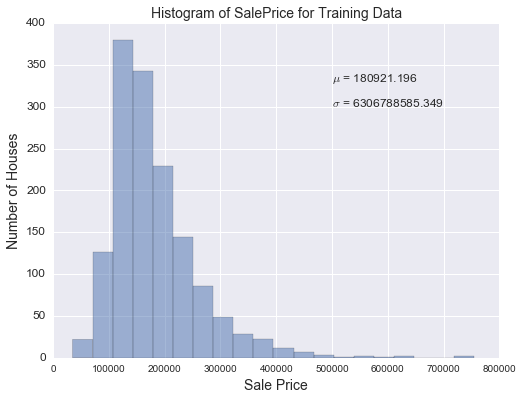

In [8]:
plt.hist(train_y.as_matrix(), bins = 20, alpha=0.5)
plt.grid(True)
#plt.title("SalePrice, $\mu$ = %0.3f, $\sigma$ = %0.3f" %(train_y.as_matrix().mean(), train_y.as_matrix().var()))
plt.title("Histogram of SalePrice for Training Data", size = 14)
plt.xlabel('Sale Price', size = 14)
plt.ylabel('Number of Houses', size = 14)
plt.text(500000, 330, "$\mu$ = %0.3f" %train_y.as_matrix().mean(), size = 12)
plt.text(500000, 300, "$\sigma$ = %0.3f" %train_y.as_matrix().var(), size = 12)
#plt.text(600000, 650, "$\mu$ = %0.3f, $\sigma$ = %0.3f" %(train_y.as_matrix().mean(), train_y.as_matrix().var()))
plt.show()

From the above hisogram we can see there is a very long tail. Most houses' prices are between 100000 to 400000. Directly analysis the sale price would make the variance very large. 

I analyze the skewness of the target values so we can find how asymmetry the target values would be.

In [9]:
train_y.skew()

SalePrice    1.882876
dtype: float64

So the skewness of target varialbe is very large. I tried another kind of expressions, which transforms the sale price by taking $log(1+SalePrice)$, to make the data more normal.
I draw another histogram of log sale price below:

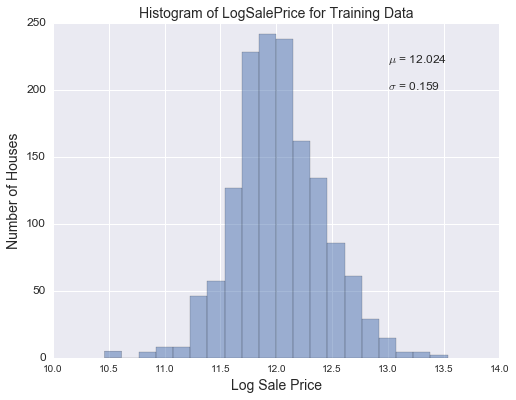

In [10]:
logprice = np.log1p(train_y.as_matrix())
plt.hist(logprice, bins = 20, alpha=0.5)
plt.grid(True)
plt.title("Histogram of LogSalePrice for Training Data", size = 14)
plt.xlabel('Log Sale Price', size = 14)
plt.ylabel('Number of Houses', size = 14)
plt.text(13, 220, "$\mu$ = %0.3f" %logprice.mean(), size = 12)
plt.text(13, 200, "$\sigma$ = %0.3f" %logprice.var(), size = 12)
#plt.text(600000, 650, "$\mu$ = %0.3f, $\sigma$ = %0.3f" %(train_y.as_matrix().mean(), train_y.as_matrix().var()))

plt.show()

### Visualize the distribution of house price in whole dataset

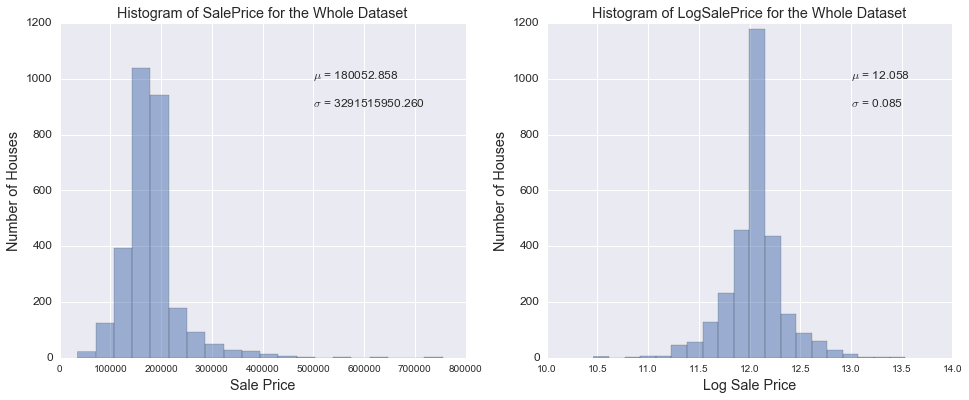

In [11]:
alldata_X = pd.concat((train_X, test_X), ignore_index = True)
## Transform target variable in testing data to integer
test_y = test_y.round(0).astype(int)
alldata_y = pd.concat((train_y, test_y), ignore_index = True)

plt.rcParams['figure.figsize'] = (16.0, 6.0)
plt.rcParams['xtick.labelsize'] = 'medium'
plt.rcParams['ytick.labelsize'] = 'large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'

fig, axs = plt.subplots(1,2)
axs[0].hist(alldata_y.as_matrix(), bins = 20, alpha=0.5)
axs[0].grid(True)
axs[0].set_xlabel('Sale Price')
axs[0].set_ylabel('Number of Houses')
axs[0].text(500000, 1000, "$\mu$ = %0.3f" %alldata_y.as_matrix().mean(), size = 12)
axs[0].text(500000, 900, "$\sigma$ = %0.3f" %alldata_y.as_matrix().var(), size = 12)
axs[0].set_title("Histogram of SalePrice for the Whole Dataset")


logallprice = np.log1p(alldata_y.as_matrix())
axs[1].hist(logallprice, bins = 20, alpha=0.5)
axs[1].grid(True)
axs[1].set_title("Histogram of LogSalePrice for the Whole Dataset")
axs[1].set_xlabel('Log Sale Price')
axs[1].set_ylabel('Number of Houses')
axs[1].text(13, 1000, "$\mu$ = %0.3f" %logallprice.mean(), size = 12)
axs[1].text(13, 900, "$\sigma$ = %0.3f" %logallprice.var(), size = 12)

plt.show()

In [12]:
from sklearn import preprocessing
# trainy = preprocessing.scale(np.log1p(train_y))
# testy = preprocessing.scale(np.log1p(test_y))
#trainy = np.log1p(train_y)
#testy = np.log1p(test_y)

pd_all['LogSalePrice'] = np.log1p(pd_all['SalePrice'])

Now we have normalized the target values. Before further preprocessing the features, I want to remove some very irrelevant features based on last phase's data exploration. For example, for Utilities, the statistics look like:

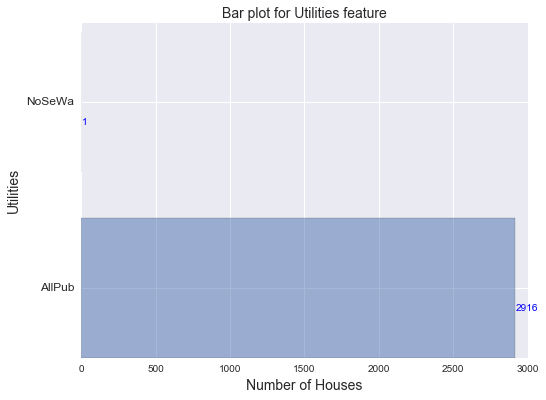

In [13]:
plt.rcParams['figure.figsize'] = (8, 6)

utilities_counts = pd_all['Utilities'].value_counts()
#utilities_counts.sort_index(inplace = True)
index_ = utilities_counts.keys()
value_ = utilities_counts.get_values()

ind = np.arange(len(index_))
width = 0.75

fig, ax = plt.subplots()  
ax.barh(ind, value_, width, alpha=0.5)
ax.grid(True)
#ax.set_yticks(ind+width/2)
#ax.set_yticklabels(index_, minor=False)
plt.yticks(ind+width/2, index_)
plt.ylabel("Utilities", size = 14)
plt.xlabel("Number of Houses", size = 14)
plt.title("Bar plot for Utilities feature", size = 14)

for i, v in enumerate(value_):
    ax.text(v + 3, i+0.25 , str(v), color='blue')

plt.show()

In [15]:
df_train = pd_train
df_test = pd_test

### Relationship with categorical features


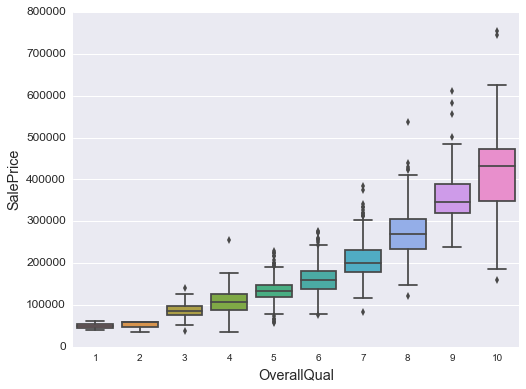

In [16]:
import seaborn as sns
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#### Sale Price and built year

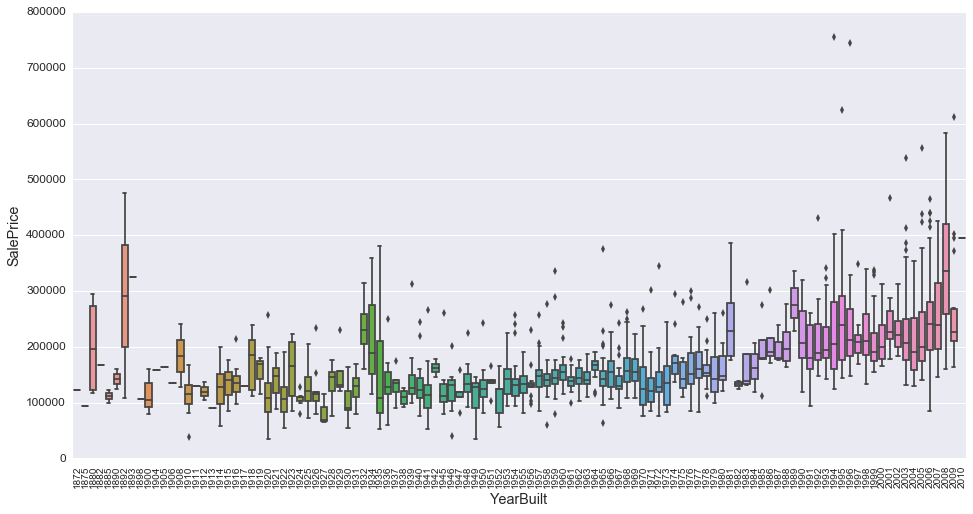

In [17]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### fill up the vacant values for some features

In [18]:
def vacant_feature_complete(data):
    #data.loc[data.MSSubClass.isnull(), 'MSSubClass'] = data.MSSubClass.median()
    data.loc[data.MSZoning.isnull(), 'MSZoning'] = 'RL'
    data.loc[data.LotFrontage.isnull(), 'LotFrontage'] = data.LotFrontage.median()

    #data.loc[data.LotArea.isnull(), 'MasVnrType'] = 0
    data.loc[data.LotArea.isnull(), 'LotArea'] = 0
    data.loc[data.Street.isnull(), 'Street'] = 'Pave'
    data.loc[data.LotShape.isnull(), 'LotShape'] = 'Reg'
    data.loc[data.LandContour.isnull(), 'LandContour'] = 'Lvl'
    data.loc[data.Utilities.isnull(), 'Utilities'] = 'AllPub'
    data.loc[data.LotConfig.isnull(), 'LotConfig'] = 'Inside'
    data.loc[data.LandSlope.isnull(), 'LandSlope'] = 'Gtl'
    #data.loc[data.Neighborhood.isnull(), 'Neighborhood'] = ''

    data.loc[data.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
    data.loc[data.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'
    data.loc[data.MasVnrType.isnull(), 'MasVnrType'] = 'None'
    data.loc[data.MasVnrType == 'None', 'MasVnrArea'] = 0

    data.loc[data.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
    data.loc[data.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
    data.loc[data.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
    data.loc[data.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
    data.loc[data.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
    data.loc[data.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = data.BsmtFinSF1.median()
    data.loc[data.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = data.BsmtUnfSF.median()
    data.loc[data.BsmtFinType1=='NoBsmt', 'BsmtFinSF1'] = 0
    data.loc[data.BsmtFinType2=='NoBsmt', 'BsmtFinSF2'] = 0
    data.loc[data.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
    data.loc[data.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0

    data.loc[data['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
    data.loc[data.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
    data.loc[data.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
    data.loc[data.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
    data.loc[data.Functional.isnull(), 'Functional'] = 'Typ'
    data.loc[data.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'

    data.loc[data.GarageType.isnull(), 'GarageType'] = 'NoGarage'
    data.loc[data.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
    data.loc[data.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
    data.loc[data.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'
    data.loc[data.GarageYrBlt.isnull(), 'GarageYrBlt'] = data.GarageYrBlt.median()
    
    #data.loc[data['GarageArea'].isnull(), 'GarageArea'] = data.loc[data['GarageType']=='Detchd', 'GarageArea'].mean()
    #data.loc[data['GarageCars'].isnull(), 'GarageCars'] = data.loc[data['GarageType']=='Detchd', 'GarageCars'].median()
    data.loc[data.GarageArea.isnull(), 'GarageArea'] = data.loc[data.GarageType == 'Detchd', 'GarageArea'].mean()
    data.loc[data.GarageCars.isnull(), 'GarageCars'] = data.loc[data.GarageType == 'Detchd', 'GarageArea'].median()
    
    data.loc[data.SaleCondition.isnull(), 'SaleCondition'] = 'Normal'
    data.loc[data.SaleCondition.isnull(), 'SaleType'] = 'WD'
    data.loc[data['SaleType'].isnull(), 'SaleType'] = 'NoSale'
    
vacant_feature_complete(pd_all)

In [19]:
pd_all.drop('Alley', axis = 1, inplace = True)
pd_all.drop('PoolQC', axis=1, inplace=True)
pd_all.drop('Fence', axis=1, inplace=True)
pd_all.drop('MiscFeature', axis=1, inplace=True)
pd_all.drop('Street', axis=1, inplace = True) # only twelve is different
pd_all.drop('Utilities', axis=1, inplace = True) # only one is different
pd_all.drop('RoofMatl', axis=1, inplace = True)
pd_all.drop('FireplaceQu', axis=1, inplace = True)
pd_all.drop('LotFrontage', axis=1, inplace = True)


In [20]:
pd_all.shape

(2919, 72)

Now I will preprocess the numerical fetures. I first log transform the features with high skewness (set threshold as 0.75). Then I scale the numerical features. Some numerical features are not suitable for z-scoring, so I will implement different scoring methods. Because the features in my dataset is very complicated. Some features are numerical but they should not be treated as numerical feature, like MSSubClass, each numerical value represents one class type. So I have to manually find the numerical features, instead of directly getting from data type in Pandas.

List all column names:

In [21]:
all_index = pd_all.columns.values
all_index

array(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorc

In [22]:
num_index = ['LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']
cat_index = ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
             'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
             'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
             'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
            'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
             'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

len(num_index)+ len(cat_index)

70

### Numerical features scaling
For most of numerical features, I will simply implement z-scoring to scale into 0 mean and 1 variance. But some numerical features are not suitable for z-scoring. For example, For the __YrSold__, which means _selling year_, which should not be scaled into 0 mean and 1 variance. I think the better method would be scaling values of year to a range. So for __time__ featues (including _month_ or _year_), I will implement _MinmaxScaler_ instead of _z-scoring_. Also, some numerical features like __OverallQual__ or __OverallCond__, represents the quality for this house. The value for this feature is a quality score. So again, I think for these kind of score features, _MinmaxScaler_ would be better than _z-scoring_.

Below, I scale all the numerical features into a range or 0 mean and 1 variance. (Based on the feature type)

In [23]:
pd_all_process = pd_all

train_var = [2006, 2007, 2008]
test_var = [2009, 2010]
train_index = pd_all_process['YrSold'].isin(train_var)
test_index = pd_all_process['YrSold'].isin(test_var)


In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

num_index_score = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
num_index_others = list(set(num_index) - set(num_index_score))


pd_all_process[num_index_score] = pd_all_process[num_index_score].apply(lambda x : MinMaxScaler().fit_transform(x))
pd_all_process[num_index_others] = pd_all_process[num_index_others].apply(lambda x : scale(x))


### Categorical features encoding
I have scale all the numerical features, then I will encode categorical features. Here I use __One-Hot-Encoding__ method to encode all categorical features.

In [25]:
pd_all['MSSubClass'] = pd_all['MSSubClass'].astype(object)
pd_all_process = pd.get_dummies(pd_all_process)

Now I have finished all feature enginering works. Let's take a look at how does data look like now.

In [26]:
pd_all_process.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_NoSale,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.217879,0.666667,0.500,0.949275,0.883333,0.532144,0.581145,-0.292374,-0.933391,-0.442295,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.072044,0.555556,0.875,0.753623,0.433333,-0.564669,1.178255,-0.292374,-0.628628,0.477472,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.137197,0.666667,0.500,0.934783,0.866667,0.341880,0.098189,-0.292374,-0.287475,-0.297307,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.078385,0.666667,0.500,0.311594,0.333333,-0.564669,-0.494529,-0.292374,-0.046394,-0.668839,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.518903,0.777778,0.500,0.927536,0.833333,1.393925,0.469187,-0.292374,-0.160112,0.212416,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
train_X = pd_all_process[: train_X.shape[0]]
test_X = pd_all_process[train_X.shape[0]:]
trainX = train_X.as_matrix()
testX = test_X.as_matrix()

In [28]:
df_all = pd_all
df_all_process = pd_all_process

### Generate training and testing dataset based on selling year

In [29]:
df_train = train_X
df_test = test_X

train_year = df_all_process.loc[train_index]
test_year = df_all_process.loc[test_index]

In [30]:
train_year.shape

(1933, 284)

### Performance measure metric: __RMSE__
I will use __Root Mean Squared Error__ as the performance measure metric in my project.

## Correlation between selling year and sale price

In [31]:
yname = ['SalePrice', 'LogSalePrice']
train_year_X = train_year.drop(yname, axis = 1, inplace = False)
train_year_y = train_year[['LogSalePrice']]

test_year_X = test_year.drop(yname, axis = 1, inplace = False)
test_year_y = test_year[['LogSalePrice']]

#### Baseline: predicting the mean of the target

In [193]:
from sklearn.metrics import mean_squared_error
meany = np.mean(train_year_y)
ypredict = np.repeat(meany, len(test_year_y))

baseRMSE = np.sqrt(mean_squared_error(test_year_y, ypredict))
baseRMSE

0.30823369473540274

In [194]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train_year_X, train_year_y, scoring = "neg_mean_squared_error", cv = 10))
    return rmse

#### 1. Lasso regression model

In [195]:
from sklearn.linear_model import Lasso

alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.3, 0.5]
#model_lasso = LassoCV()
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter = 500000)).mean() for alpha in alphas]

In [196]:
cv_lasso

[0.29542466966927794,
 0.23656325527906197,
 0.22937148654831727,
 0.22331165221115437,
 0.2220015374113567,
 0.21787201157837771,
 0.21928223552619616,
 0.24227042643323773,
 0.24227042643323773]

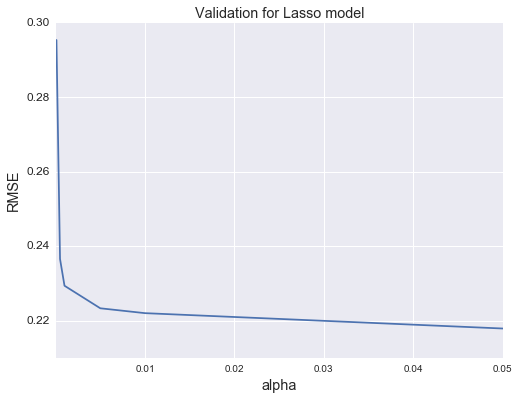

In [197]:
pd.Series(cv_lasso[:6], index = alphas[:6]).plot(title = "Validation for Lasso model", grid = True)
plt.xlabel('alpha')
plt.ylabel("RMSE")

Now we choose the best alpha for Lasso regression model

In [198]:
best_alpha_for_lasso = alphas[np.argmin(np.array(cv_lasso))]
best_alpha_for_lasso

0.05

Train the model with best parameter

In [199]:
model_lasso = Lasso(alpha = best_alpha_for_lasso)
model_lasso.fit(train_year_X, train_year_y)
rmse_lasso_test = np.sqrt(mean_squared_error(test_year_y, model_lasso.predict(test_year_X)))
rmse_lasso_test

0.25288527857608567

##### Feature Selection

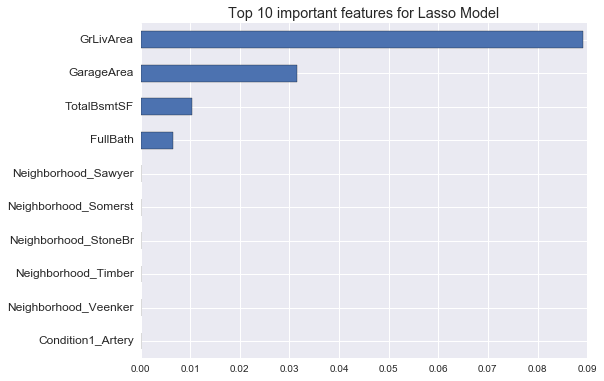

In [323]:
coef = pd.Series(model_lasso.coef_, index = train_year_X.columns).sort_values(ascending = True)
#importance_coef_lasso = pd.concat([coef.head(10), coef.tail(10)])
#importance_coef_lasso.plot(kind = 'barh', grid = True)
#plt.title("Top 10 Positive and Negative Coefficient for Lasso Model")

coef.tail(10).plot(kind = 'barh', grid = True)
plt.title("Top 10 important features for Lasso Model")

Top 10 positive features:

In [205]:
coef.tail(10).axes

[Index(['Condition1_Artery', 'Neighborhood_Veenker', 'Neighborhood_Timber',
        'Neighborhood_StoneBr', 'Neighborhood_Somerst', 'Neighborhood_Sawyer',
        'FullBath', 'TotalBsmtSF', 'GarageArea', 'GrLivArea'],
       dtype='object')]

In [206]:
coef.tail(10).sort_values(ascending = False)

GrLivArea               0.089101
GarageArea              0.031503
TotalBsmtSF             0.010274
FullBath                0.006473
Neighborhood_Sawyer    -0.000000
Neighborhood_Somerst    0.000000
Neighborhood_StoneBr    0.000000
Neighborhood_Timber     0.000000
Neighborhood_Veenker    0.000000
Condition1_Artery      -0.000000
dtype: float64

Top 10 negative features

In [207]:
coef.head(10).axes

[Index(['LotArea', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
        'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd',
        'BsmtQual_NoBsmt', 'BsmtQual_TA'],
       dtype='object')]

In [209]:
coef.head(10)

LotArea             0.0
Foundation_PConc    0.0
Foundation_Slab    -0.0
Foundation_Stone   -0.0
Foundation_Wood     0.0
BsmtQual_Ex         0.0
BsmtQual_Fa        -0.0
BsmtQual_Gd         0.0
BsmtQual_NoBsmt    -0.0
BsmtQual_TA        -0.0
dtype: float64

Visualize the model performance

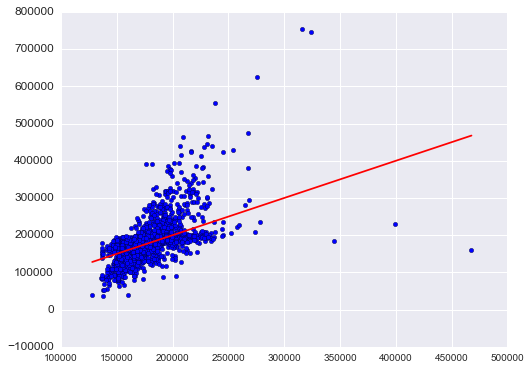

In [210]:
lasso_pred = np.expm1(model_lasso.predict(train_year_X))
plt.scatter(lasso_pred, np.expm1(train_year_y))
plt.plot([min(lasso_pred),max(lasso_pred)], [min(lasso_pred),max(lasso_pred)], c="red")

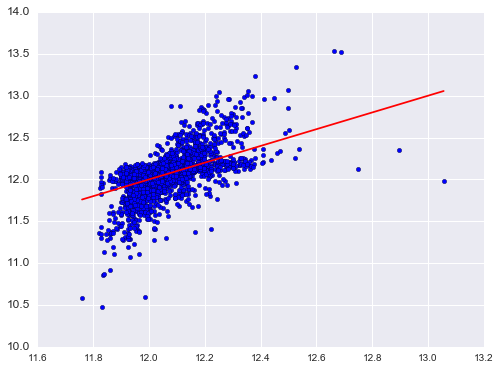

In [211]:
lasso_pred = (model_lasso.predict(train_year_X))
plt.scatter(lasso_pred, (train_year_y))
plt.plot([min(lasso_pred),max(lasso_pred)], [min(lasso_pred),max(lasso_pred)], c="red")

### Ridge regression model

In [212]:
from sklearn.linear_model import Ridge
alphas = [0.0005, 0.001,0.01, 0.05, 0.1, 0.5, 1, 5, 20, 50]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

In [213]:
cv_ridge

[0.35926480005110767,
 0.34351037222745057,
 0.31952703966407553,
 0.31658138731520663,
 0.31452860734991916,
 0.30183041559598911,
 0.29059768908952333,
 0.25634749282332026,
 0.23677313841692915,
 0.23046357246634169]

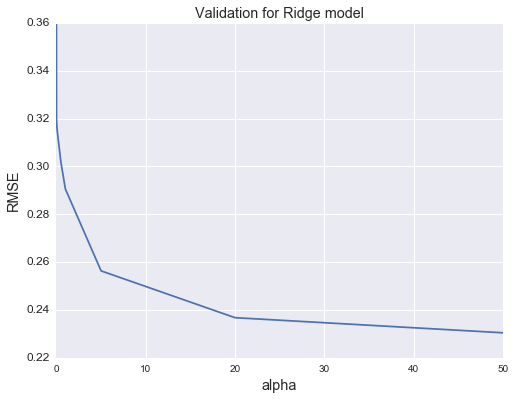

In [214]:
pd.Series(cv_ridge, index = alphas).plot(title = "Validation for Ridge model", grid = True)
plt.xlabel('alpha')
plt.ylabel("RMSE")

In [215]:
best_alpha_for_ridge = alphas[np.argmin(np.array(cv_ridge))]
best_alpha_for_ridge

50

In [216]:
model_ridge = Ridge(alpha = best_alpha_for_ridge)
model_ridge.fit(train_year_X, train_year_y)
rmse_ridge_test = np.sqrt(mean_squared_error(test_year_y, model_ridge.predict(test_year_X)))
rmse_ridge_test

0.21753385067951053

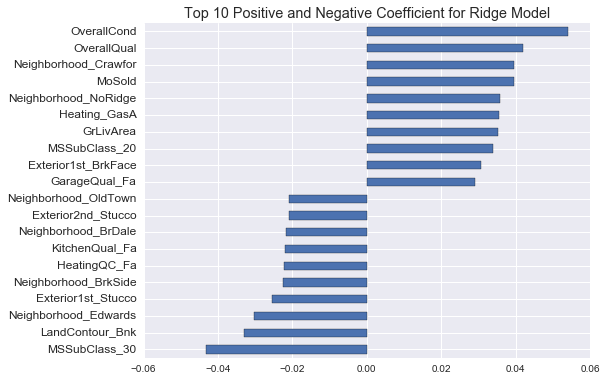

In [217]:
coef = pd.Series(model_ridge.coef_[0], index = train_year_X.columns).sort_values()
importance_coef_ridge = pd.concat([coef.head(10), coef.tail(10)])
importance_coef_ridge.plot(kind = 'barh', grid = True)
plt.title("Top 10 Positive and Negative Coefficient for Ridge Model")

In [218]:
coef.tail(10).axes

[Index(['GarageQual_Fa', 'Exterior1st_BrkFace', 'MSSubClass_20', 'GrLivArea',
        'Heating_GasA', 'Neighborhood_NoRidge', 'MoSold',
        'Neighborhood_Crawfor', 'OverallQual', 'OverallCond'],
       dtype='object')]

In [219]:
coef.tail(10).sort_values(ascending = False)

OverallCond             0.054009
OverallQual             0.041933
Neighborhood_Crawfor    0.039649
MoSold                  0.039469
Neighborhood_NoRidge    0.035719
Heating_GasA            0.035554
GrLivArea               0.035195
MSSubClass_20           0.033984
Exterior1st_BrkFace     0.030837
GarageQual_Fa           0.029030
dtype: float64

In [220]:
coef.head(10).axes

[Index(['MSSubClass_30', 'LandContour_Bnk', 'Neighborhood_Edwards',
        'Exterior1st_Stucco', 'Neighborhood_BrkSide', 'HeatingQC_Fa',
        'KitchenQual_Fa', 'Neighborhood_BrDale', 'Exterior2nd_Stucco',
        'Neighborhood_OldTown'],
       dtype='object')]

In [221]:
coef.head(10)

MSSubClass_30          -0.043266
LandContour_Bnk        -0.033114
Neighborhood_Edwards   -0.030213
Exterior1st_Stucco     -0.025415
Neighborhood_BrkSide   -0.022541
HeatingQC_Fa           -0.022216
KitchenQual_Fa         -0.021867
Neighborhood_BrDale    -0.021603
Exterior2nd_Stucco     -0.020871
Neighborhood_OldTown   -0.020790
dtype: float64

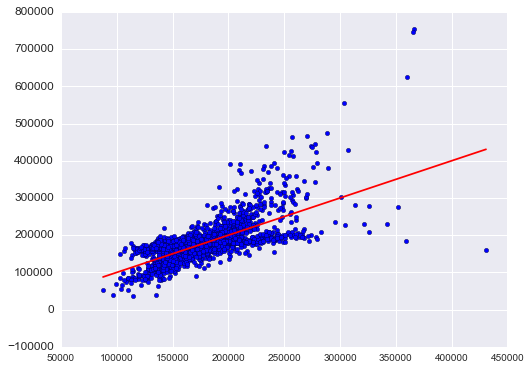

In [222]:
ridge_pred = np.expm1(model_ridge.predict(train_year_X))
plt.scatter(ridge_pred, np.expm1(train_year_y))
plt.plot([min(ridge_pred),max(ridge_pred)], [min(ridge_pred),max(ridge_pred)], c="red")

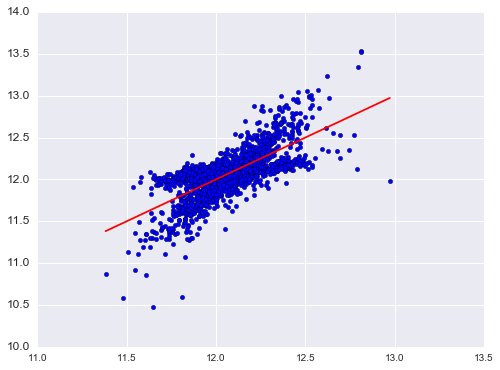

In [223]:
ridge_pred = (model_ridge.predict(train_year_X))
plt.scatter(ridge_pred, (train_year_y))
plt.plot([min(ridge_pred),max(ridge_pred)], [min(ridge_pred),max(ridge_pred)], c="red")

### RBF kernel Support Vector Regresssion model

In [225]:
cv_svr

array([[ 0.2424161 ,  0.21730113,  0.21392765,  0.2521278 ],
       [ 0.26343556,  0.22937702,  0.23292947,  0.31954818],
       [ 0.26701104,  0.23283172,  0.23810459,  0.32319502],
       [ 0.26533246,  0.23988163,  0.24421501,  0.32319502]])

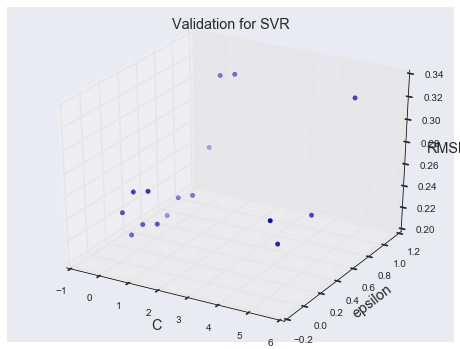

In [226]:
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')

c1d = np.repeat(C, len(epsilon))
e1d = np.array(epsilon* len(C))
cv_svr1d = np.array(cv_svr).flatten()

threedee.scatter(c1d, e1d, cv_svr1d)
threedee.set_xlabel('C')
threedee.set_ylabel('epsilon')
threedee.set_zlabel('RMSE')
threedee.set_title('Validation for SVR')

plt.show()

In [227]:
minindex = np.unravel_index(np.argmin(cv_svr), cv_svr.shape)
best_c_for_svr = C[minindex[0]]
best_e_for_svr = epsilon[minindex[1]]
best_c_for_svr, best_e_for_svr

(0.1, 0.5)

In [228]:
model_svr = SVR(C = best_c_for_svr, epsilon = best_e_for_svr)
model_svr.fit(train_year_X, train_year_y)
rmse_svr_test = np.sqrt(mean_squared_error(test_year_y, model_svr.predict(test_year_X)))
rmse_svr_test

0.22886214760675452

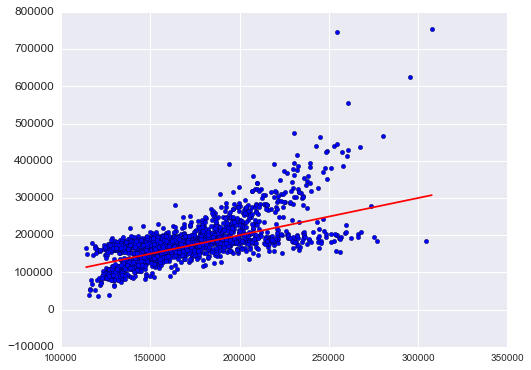

In [229]:
svr_pred = np.expm1(model_svr.predict(train_year_X))
plt.scatter(svr_pred, np.expm1(train_year_y))
plt.plot([min(svr_pred),max(svr_pred)], [min(svr_pred),max(svr_pred)], c="red")

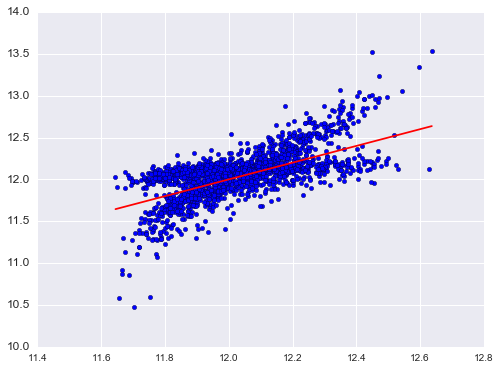

In [230]:
svr_pred = (model_svr.predict(train_year_X))
plt.scatter(svr_pred, (train_year_y))
plt.plot([min(svr_pred),max(svr_pred)], [min(svr_pred),max(svr_pred)], c="red")

#### Linear  kernel SVR model

In [231]:
from sklearn.svm import LinearSVR
C = [0.1, 0.5, 1, 5]
epsilon = [0.01, 0.1, 0.5, 1]
cv_svr = np.empty([len(C), len(epsilon)])
for i in range(len(C)):
    for j in range(len(epsilon)):
        cv_svr[i][j] = rmse_cv(LinearSVR(C = C[i], epsilon = epsilon[j])).mean()

In [233]:
cv_svr

array([[ 0.30386128,  0.26134454,  0.32399562,  0.50022134],
       [ 0.3400862 ,  0.29018923,  0.31412107,  0.50177913],
       [ 0.34437652,  0.30488194,  0.31377542,  0.50178325],
       [ 0.33424815,  0.2857185 ,  0.31417613,  0.50179538]])

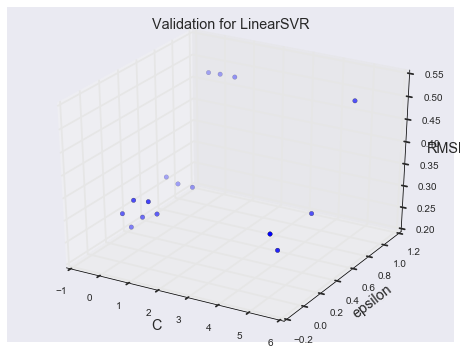

In [234]:
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')

c1d = np.repeat(C, len(epsilon))
e1d = np.array(epsilon* len(C))
cv_svr1d = np.array(cv_svr).flatten()

threedee.scatter(c1d, e1d, cv_svr1d)
threedee.set_xlabel('C')
threedee.set_ylabel('epsilon')
threedee.set_zlabel('RMSE')
threedee.set_title('Validation for LinearSVR')

plt.show()

In [235]:
minindex = np.unravel_index(np.argmin(cv_svr), cv_svr.shape)
best_c_for_svr = C[minindex[0]]
best_e_for_svr = epsilon[minindex[1]]
best_c_for_svr, best_e_for_svr

(0.1, 0.1)

In [236]:
model_lsvr = LinearSVR(C = best_c_for_svr, epsilon = best_e_for_svr)
model_lsvr.fit(train_year_X, train_year_y)
rmse_lsvr_test = np.sqrt(mean_squared_error(test_year_y, model_lsvr.predict(test_year_X)))
rmse_lsvr_test

0.22907329882700569

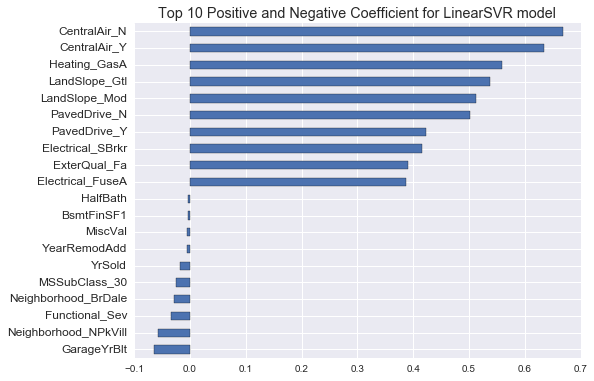

In [237]:
coef = pd.Series(model_lsvr.coef_, index = train_year_X.columns).sort_values()
importance_coef_lsvr = pd.concat([coef.head(10), coef.tail(10)])
importance_coef_lsvr.plot(kind = 'barh', grid = True)
plt.title("Top 10 Positive and Negative Coefficient for LinearSVR model")

In [238]:
coef.tail(10).axes

[Index(['Electrical_FuseA', 'ExterQual_Fa', 'Electrical_SBrkr', 'PavedDrive_Y',
        'PavedDrive_N', 'LandSlope_Mod', 'LandSlope_Gtl', 'Heating_GasA',
        'CentralAir_Y', 'CentralAir_N'],
       dtype='object')]

In [239]:
coef.tail(10).sort_values(ascending = False)

CentralAir_N        0.668144
CentralAir_Y        0.635070
Heating_GasA        0.559293
LandSlope_Gtl       0.537084
LandSlope_Mod       0.511970
PavedDrive_N        0.502006
PavedDrive_Y        0.422857
Electrical_SBrkr    0.415341
ExterQual_Fa        0.390595
Electrical_FuseA    0.387384
dtype: float64

In [240]:
coef.head(10).axes

[Index(['GarageYrBlt', 'Neighborhood_NPkVill', 'Functional_Sev',
        'Neighborhood_BrDale', 'MSSubClass_30', 'YrSold', 'YearRemodAdd',
        'MiscVal', 'BsmtFinSF1', 'HalfBath'],
       dtype='object')]

In [241]:
coef.head(10)

GarageYrBlt            -0.064444
Neighborhood_NPkVill   -0.057794
Functional_Sev         -0.033446
Neighborhood_BrDale    -0.029227
MSSubClass_30          -0.025908
YrSold                 -0.017696
YearRemodAdd           -0.005623
MiscVal                -0.005131
BsmtFinSF1             -0.004368
HalfBath               -0.004272
dtype: float64

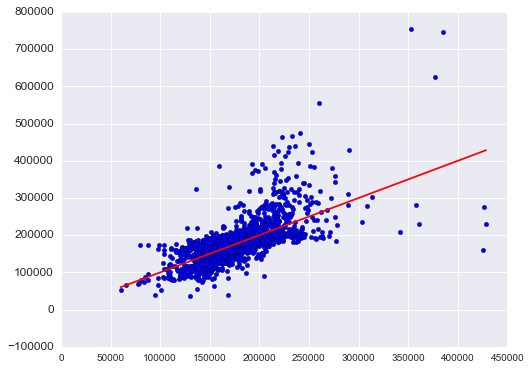

In [242]:
lsvr_pred = np.expm1(model_lsvr.predict(train_year_X))
plt.scatter(lsvr_pred, np.expm1(train_year_y))
plt.plot([min(lsvr_pred),max(lsvr_pred)], [min(lsvr_pred),max(lsvr_pred)], c="red")

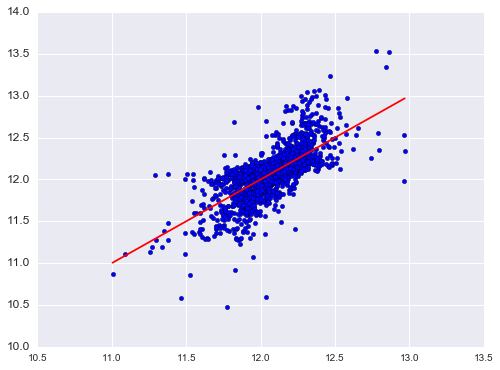

In [243]:
lsvr_pred = (model_lsvr.predict(train_year_X))
plt.scatter(lsvr_pred, (train_year_y))
plt.plot([min(lsvr_pred),max(lsvr_pred)], [min(lsvr_pred),max(lsvr_pred)], c="red")

### Multiple layer Regression Model

from sklearn.neural_network import MLPRegressor
hidden_layer_sizes = [(500,), (500,100,), (500,100,50,)]
activation = ['logistic', 'relu']
alpha = [0.0001, 0.001, 0.01]
cv_mlp = np.empty([len(hidden_layer_sizes), len(activation), len(alpha)])

for i in range(len(hidden_layer_sizes)):
    for j in range(len(activation)):
        for k in range(len(alpha)):
            cv_mlp[i][j][k] = rmse_cv(MLPRegressor(hidden_layer_sizes = hidden_layer_sizes[i], activation = activation[j],
                                                  alpha = alpha[k])).mean()

In [249]:
cv_mlp

array([[[ 0.25129622,  0.25908186,  0.2515328 ],
        [ 0.30003698,  0.29787718,  0.31611931]],

       [[ 0.24301275,  0.24336487,  0.24283922],
        [ 0.53926695,  0.5098984 ,  0.46681976]],

       [[ 0.24560727,  0.24585262,  0.24500416],
        [ 0.4566444 ,  0.48337723,  0.44726011]]])

In [256]:
minindex = np.unravel_index(np.argmin(cv_mlp), cv_mlp.shape)
best_hiddenlayer_for_mlp = hidden_layer_sizes[minindex[0]]
best_activation_for_mlp = activation[minindex[1]]
best_alpha_for_mlp = alpha[minindex[2]]
best_hiddenlayer_for_mlp, best_activation_for_mlp, best_alpha_for_mlp

((500, 100), 'logistic', 0.001)

In [261]:
mlp_model = MLPRegressor(hidden_layer_sizes = best_hiddenlayer_for_mlp, activation = best_activation_for_mlp,
                        alpha = best_alpha_for_mlp)
mlp_model.fit(train_year_X, train_year_y)


MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

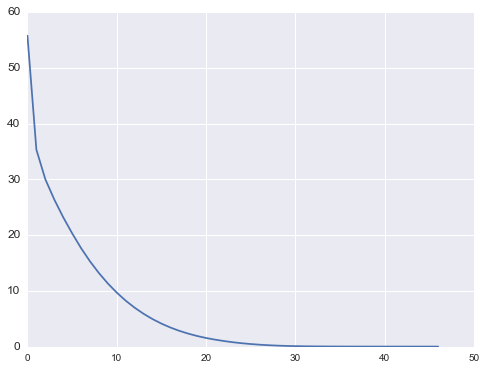

In [263]:
plt.plot(mlp_model.loss_curve_)

In [264]:
rmse_mlp_test = np.sqrt(mean_squared_error(test_year_y, mlp_model.predict(test_year_X)))
rmse_mlp_test

0.3072938074362252

In [275]:
np.sqrt(mean_squared_error(train_year_y, mlp_model.predict(train_year_X)))
mlp_model.n_iter_

47

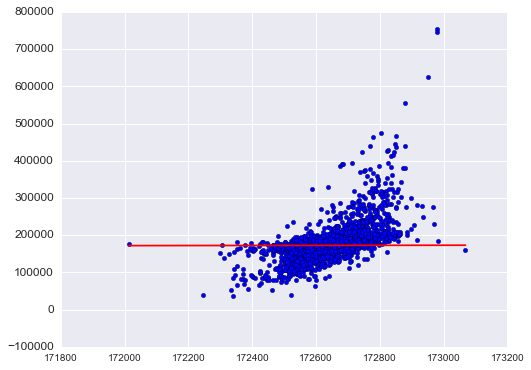

In [284]:
mlp_pred = np.expm1(mlp_model.predict(train_year_X))
plt.scatter(mlp_pred, np.expm1(train_year_y))
plt.plot([min(mlp_pred),max(mlp_pred)], [min(mlp_pred),max(mlp_pred)], c="red")

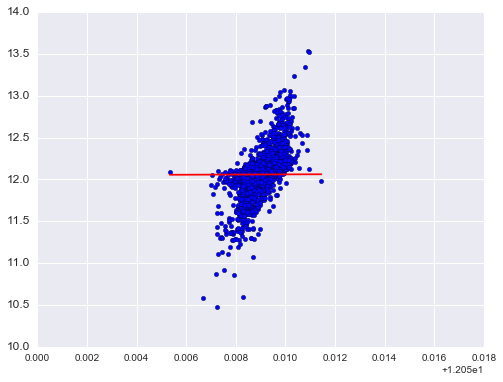

In [292]:
mlp_pred = (mlp_model.predict(train_year_X))
plt.scatter(mlp_pred, (train_year_y))
plt.plot([min(mlp_pred),max(mlp_pred)], [min(mlp_pred),max(mlp_pred)], c="red")

### Elastic Net Regression

In [253]:
from sklearn.linear_model import ElasticNet
alpha = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10]
l1_ratio = [0.01, 0.1, 0.5, 0.9, 0.99]

cv_enr = np.empty([len(alpha), len(l1_ratio)])
for i in range(len(alpha)):
    for j in range(len(l1_ratio)):
        cv_enr[i][j] = rmse_cv(ElasticNet(alpha = alpha[i], l1_ratio = l1_ratio[j])).mean()
        

In [254]:
cv_enr

array([[ 0.31159688,  0.30936224,  0.30239228,  0.29673051,  0.29555628],
       [ 0.29222563,  0.28571559,  0.26587917,  0.24192089,  0.23706184],
       [ 0.27794802,  0.26865356,  0.23500675,  0.22972026,  0.22940051],
       [ 0.23602457,  0.22800536,  0.22313352,  0.22229507,  0.22203016],
       [ 0.22350667,  0.22064009,  0.21752093,  0.21839463,  0.21918403],
       [ 0.21526515,  0.22441165,  0.24227043,  0.24227043,  0.24227043],
       [ 0.23496183,  0.24227043,  0.24227043,  0.24227043,  0.24227043]])

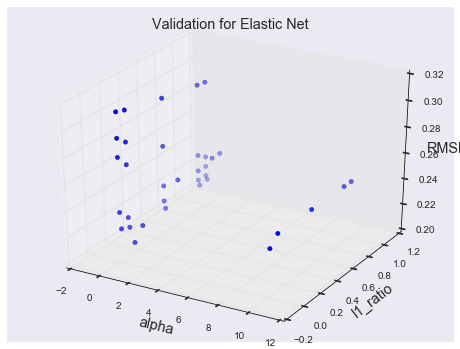

In [285]:
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')

c1d = np.repeat(alpha, len(l1_ratio))
e1d = np.array(l1_ratio* len(alpha))
cv_enr1d = np.array(cv_enr).flatten()

threedee.scatter(c1d, e1d, cv_enr1d)
threedee.set_xlabel('alpha')
threedee.set_ylabel('l1_ratio')
threedee.set_zlabel('RMSE')
threedee.set_title('Validation for Elastic Net')

plt.show()

In [286]:
minindex = np.unravel_index(np.argmin(cv_enr), cv_enr.shape)
best_alpha_for_enr = alpha[minindex[0]]
best_ratio_for_enr = l1_ratio[minindex[1]]
best_alpha_for_enr, best_ratio_for_enr

(1, 0.01)

In [288]:
model_enr = ElasticNet(alpha = best_alpha_for_enr, l1_ratio = best_ratio_for_enr)
model_enr.fit(train_year_X, train_year_y)
rmse_enr_test = np.sqrt(mean_squared_error(test_year_y, model_enr.predict(test_year_X)))
rmse_enr_test

0.23629327382618046

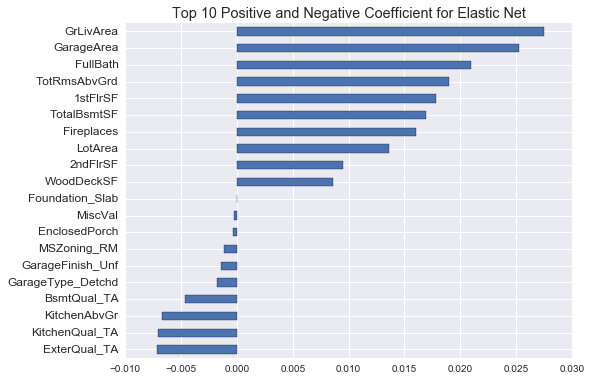

In [325]:
coef = pd.Series(model_enr.coef_, index = train_year_X.columns).sort_values()
importance_coef_enr = pd.concat([coef.head(10), coef.tail(10)])
importance_coef_enr.plot(kind = 'barh', grid = True)
plt.title("Top 10 Positive and Negative Coefficient for Elastic Net")

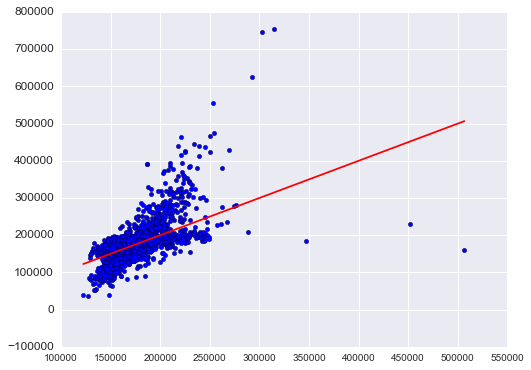

In [289]:
enr_pred = np.expm1(model_enr.predict(train_year_X))
plt.scatter(enr_pred, np.expm1(train_year_y))
plt.plot([min(enr_pred),max(enr_pred)], [min(enr_pred),max(enr_pred)], c="red")

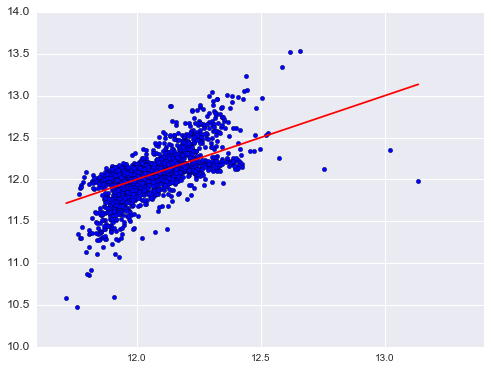

In [290]:
enr_pred = (model_enr.predict(train_year_X))
plt.scatter(enr_pred, (train_year_y))
plt.plot([min(enr_pred),max(enr_pred)], [min(enr_pred),max(enr_pred)], c="red")

### Random Forest Rgression

In [293]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = [5,10,50, 100, 500]

cv_rfr = [rmse_cv(RandomForestRegressor(n_estimators = n_estimator)).mean() for n_estimator in n_estimators]

In [294]:
cv_rfr

[0.25178745733932861,
 0.24330707613571861,
 0.23980183171716957,
 0.2373669213665453,
 0.23647728616451738]

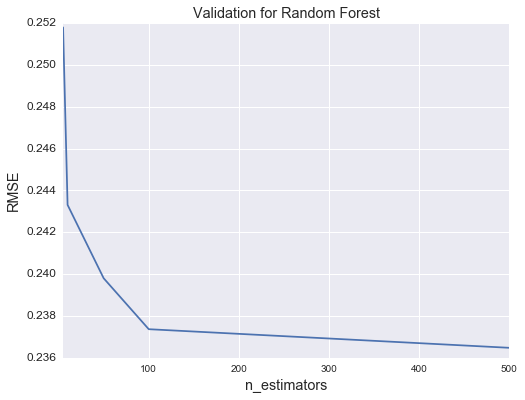

In [295]:
pd.Series(cv_rfr[:5], index = n_estimators[:5]).plot(title = "Validation for Random Forest", grid = True)
plt.xlabel('n_estimators')
plt.ylabel("RMSE")

In [297]:
best_n_for_rfr = n_estimators[np.argmin(np.array(cv_rfr))]
best_n_for_rfr

500

In [301]:
model_rfr = RandomForestRegressor(n_estimators = best_n_for_rfr, n_jobs = -1)
model_rfr.fit(train_year_X, train_year_y)
rmse_rfr_test = np.sqrt(mean_squared_error(test_year_y, model_rfr.predict(test_year_X)))
rmse_rfr_test

0.21860400072786956

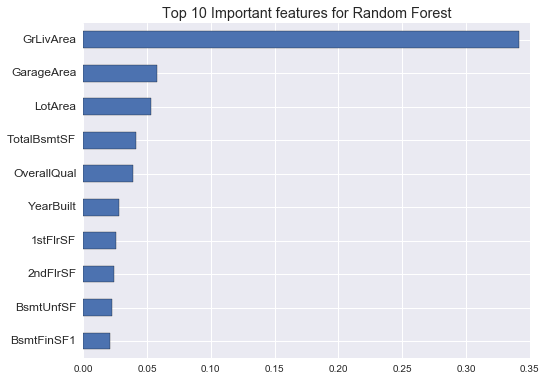

In [324]:
coef = pd.Series(model_rfr.feature_importances_, index = train_year_X.columns).sort_values()
importance_coef_rfr = pd.concat([coef.tail(10)])#, coef.tail(10)])
importance_coef_rfr.plot(kind = 'barh', grid = True)
plt.title("Top 10 Important features for Random Forest")

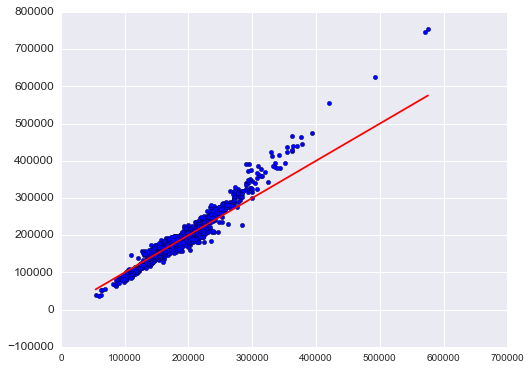

In [326]:
rfr_pred = np.expm1(model_rfr.predict(train_year_X))
plt.scatter(rfr_pred, np.expm1(train_year_y))
plt.plot([min(rfr_pred),max(rfr_pred)], [min(rfr_pred),max(rfr_pred)], c="red")

### Gradient Boosting

In [307]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, 
                                  loss='huber').fit(train_year_X, train_year_y)
rmse_gb_test = np.sqrt(mean_squared_error(test_year_y, model_gb.predict(test_year_X)))
rmse_gb_test

0.22455834638238129

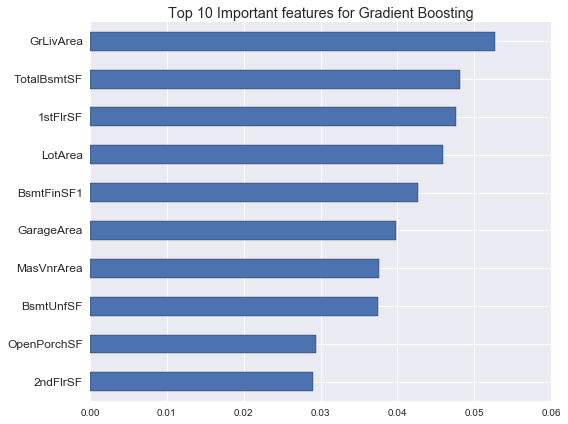

In [322]:
coef = pd.Series(model_gb.feature_importances_, index = train_year_X.columns).sort_values()
importance_coef_gb = pd.concat([coef.tail(10)])#, coef.tail(10)])
importance_coef_gb.plot(kind = 'barh', grid = True)
plt.title("Top 10 Important features for Gradient Boosting")
plt.tight_layout()

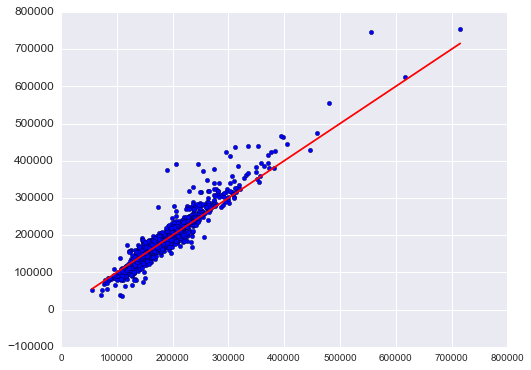

In [311]:
gb_pred = np.expm1(model_gb.predict(train_year_X))
plt.scatter(gb_pred, np.expm1(train_year_y))
plt.plot([min(gb_pred),max(gb_pred)], [min(gb_pred),max(gb_pred)], c="red")

### Baseline: RMSE of predicting the mean of the target.

Because the target values in testing data are not the groundtruth, it's just a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms. So for my project, the best choice of evaluation should be based on cross-validation over training set. Calculating RMSE over testing dataset will introduce a lot of bias for my model real performance, because I have no real groundtruth for testing data. So I will calculate two baselines, first is based on the full dataset (training + testing) and second is just based on training dataset (which have the true groundtruth).

#### Baseline over all dataset

In [35]:
yname = ['SalePrice', 'LogSalePrice']
train_X = df_train.drop(yname, axis = 1, inplace = False)
train_y = df_train[['LogSalePrice']]

test_X = df_test.drop(yname, axis = 1, inplace = False)
test_y = df_test[['LogSalePrice']]

In [36]:
from sklearn.metrics import mean_squared_error
ytrue = np.append(train_y, test_y)
meany = np.mean(ytrue)
ypredict = np.repeat(meany, len(ytrue))

baseRMSE = np.sqrt(mean_squared_error(ytrue, ypredict))
baseRMSE

0.29147816770677093

#### Baseline over testing dataset

In [37]:
from sklearn.metrics import mean_squared_error
#ytrue = np.append(trainy, testy)
meany = np.mean(train_y)
ypredict = np.repeat(meany, len(test_y))

baseRMSE = np.sqrt(mean_squared_error(test_y, ypredict))
baseRMSE

0.11282578701512792

#### 1. Lasso regression model
* For the lasso regression model, the main parameter is the weight of regularization _alpha_.
* I set the value of _alpha_ as [0.0005, 0.001,0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 20, 50]

In [38]:
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, train_X, train_y, scoring = "neg_mean_squared_error", cv = 10))
    return rmse

In [39]:
from sklearn.linear_model import Lasso

alphas = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 0.1, 0.3, 0.5]
#model_lasso = LassoCV()
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter = 500000)).mean() for alpha in alphas]

In [40]:
cv_lasso

[0.1409306597592265,
 0.13387703857180039,
 0.13498821176761519,
 0.15969060281351782,
 0.17714167582226917,
 0.22410060699138096,
 0.25831902701672771,
 0.39863740799010461,
 0.39863740799010461]

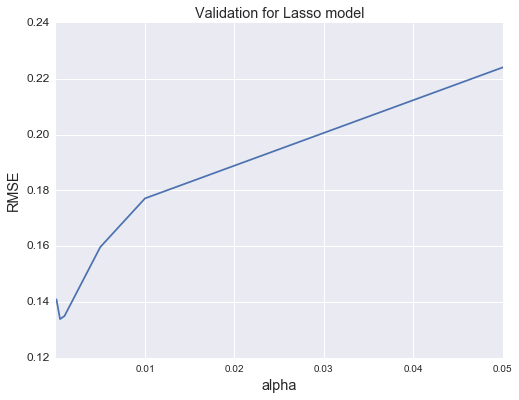

In [41]:
pd.Series(cv_lasso[:6], index = alphas[:6]).plot(title = "Validation for Lasso model", grid = True)
plt.xlabel('alpha')
plt.ylabel("RMSE")

In [42]:
best_alpha_for_lasso = alphas[np.argmin(np.array(cv_lasso))]
best_alpha_for_lasso

0.0005

Then we first train Lasso model with best parameter we choose from 10 cross-validation, and then test over the testing dataset.

In [43]:
model_lasso = Lasso(alpha = best_alpha_for_lasso)
model_lasso.fit(train_X, train_y)
rmse_lasso_test = np.sqrt(mean_squared_error(test_y, model_lasso.predict(test_X)))
rmse_lasso_test

0.43383710677442144

### Feature selection for Lasso model
I want to analyze the feature importance in Lasso model with the best parameter (alpha = 0.0005). So I will show the top 10 positive features and top 10 negative features.

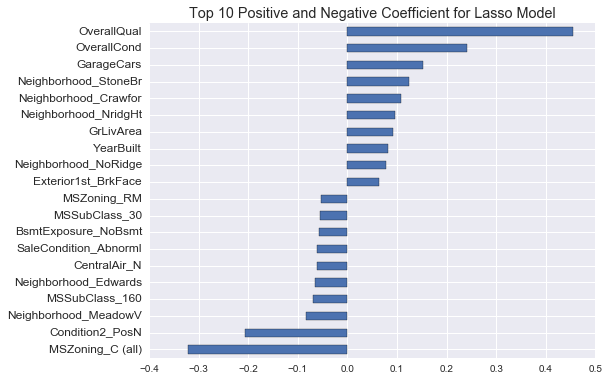

In [44]:
coef = pd.Series(model_lasso.coef_, index = train_X.columns).sort_values()
importance_coef_lasso = pd.concat([coef.head(10), coef.tail(10)])
importance_coef_lasso.plot(kind = 'barh', grid = True)
plt.title("Top 10 Positive and Negative Coefficient for Lasso Model")

So obviously the top 10 positive features are:

In [45]:
coef.tail(10).axes

[Index(['Exterior1st_BrkFace', 'Neighborhood_NoRidge', 'YearBuilt', 'GrLivArea',
        'Neighborhood_NridgHt', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr',
        'GarageCars', 'OverallCond', 'OverallQual'],
       dtype='object')]

In [46]:
coef.tail(10).sort_values(ascending = False)

OverallQual             0.455124
OverallCond             0.241452
GarageCars              0.153216
Neighborhood_StoneBr    0.123213
Neighborhood_Crawfor    0.108918
Neighborhood_NridgHt    0.096639
GrLivArea               0.092255
YearBuilt               0.081361
Neighborhood_NoRidge    0.077390
Exterior1st_BrkFace     0.063178
dtype: float64

Let's visualize the our Lasso model's performance.

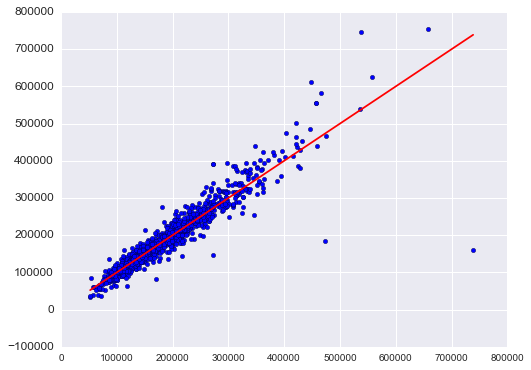

In [47]:
lasso_pred = np.expm1(model_lasso.predict(train_X))
plt.scatter(lasso_pred, np.expm1(train_y))
plt.plot([min(lasso_pred),max(lasso_pred)], [min(lasso_pred),max(lasso_pred)], c="red")

#### 2. RBF kernel Support Vector Regression model
* For the support vector regression, the parameters are:
* C: penalty parameter for error term, we set [0.01, 0.1, 0.5, 1, 5, 20]
* epsilon: epsilon for epsilon-SVR and specifies the epsilon-tube within which no penalty is associated. We set [0.005, 0.01, 0.1, 0.5, 1, 5]
* Kernel: kernel function, we set ['rbf', 'linear', 'sigmoid']

In [48]:
from sklearn.svm import SVR
C = [0.1, 0.5, 1, 5]
epsilon = [0.01, 0.1, 0.5, 1]
# We will not validate kernel function, because it consumes a lot of time for corss-validation
#kernel = ['rbf', 'linear', 'sigmoid']
#cv_svr = np.empty([len(C), len(epsilon), len(kernel)])
cv_svr = np.empty([len(C), len(epsilon)])
for i in range(len(C)):
    for j in range(len(epsilon)):
        #for k in range(len(kernel)):
            #cv_svr[i][j][k] = rmse_cv(SVR(C = C[i], epsilon = epsilon[j], kernel = kernel[k])).mean()
        cv_svr[i][j] = rmse_cv(SVR(C = C[i], epsilon = epsilon[j])).mean()
            

So for each parameter setting, the mean RMSE for each fold is:

In [49]:
cv_svr

array([[ 0.14720668,  0.1506729 ,  0.2315983 ,  0.33645529],
       [ 0.12860585,  0.13280216,  0.21457927,  0.34188821],
       [ 0.12307856,  0.12741778,  0.22146362,  0.34206743],
       [ 0.11990205,  0.12506815,  0.21729554,  0.34206743]])

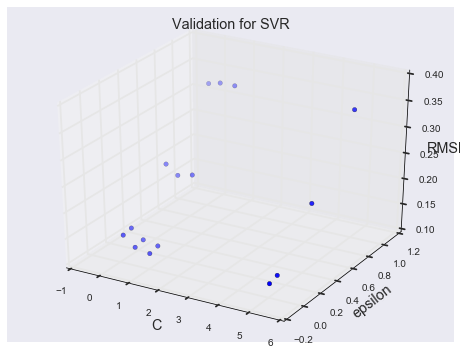

In [50]:
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')

c1d = np.repeat(C, len(epsilon))
e1d = np.array(epsilon* len(C))
cv_svr1d = np.array(cv_svr).flatten()

threedee.scatter(c1d, e1d, cv_svr1d)
threedee.set_xlabel('C')
threedee.set_ylabel('epsilon')
threedee.set_zlabel('RMSE')
threedee.set_title('Validation for SVR')

plt.show()

Now we choose the best C and epsilon for SVR regression model.

In [51]:
minindex = np.unravel_index(np.argmin(cv_svr), cv_svr.shape)
best_c_for_svr = C[minindex[0]]
best_e_for_svr = epsilon[minindex[1]]
best_c_for_svr, best_e_for_svr

(5, 0.01)

Then we first train SVR model with best parameter we choose from 10 cross-validation, and then test over the testing dataset.

In [57]:
model_svr = SVR(C = best_c_for_svr, epsilon = best_e_for_svr)
model_svr.fit(train_X, train_y)
rmse_svr_test = np.sqrt(mean_squared_error(test_y, model_svr.predict(test_X)))
rmse_svr_test

0.14209650676736868

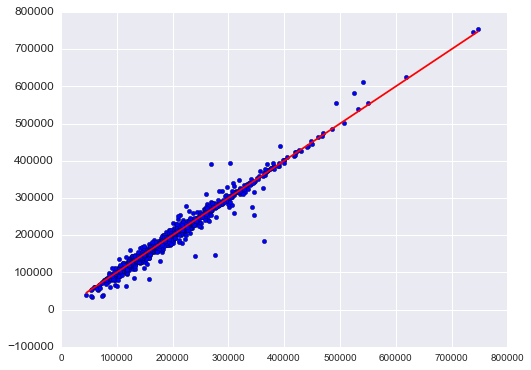

In [56]:
svr_pred = np.expm1(model_svr.predict(train_X))
plt.scatter(svr_pred, np.expm1(train_y))
plt.plot([min(svr_pred),max(svr_pred)], [min(svr_pred),max(svr_pred)], c="red")

### Elastic Net

In [58]:
from sklearn.linear_model import ElasticNet
alpha = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10]
l1_ratio = [0.01, 0.1, 0.5, 0.9, 0.99]

cv_enr = np.empty([len(alpha), len(l1_ratio)])
for i in range(len(alpha)):
    for j in range(len(l1_ratio)):
        cv_enr[i][j] = rmse_cv(ElasticNet(alpha = alpha[i], l1_ratio = l1_ratio[j])).mean()

In [59]:
cv_enr

array([[ 0.14685633,  0.1458017 ,  0.14318253,  0.14133064,  0.14097142],
       [ 0.14184495,  0.13959932,  0.1351879 ,  0.13396677,  0.1338804 ],
       [ 0.1392676 ,  0.13659365,  0.13345817,  0.13461754,  0.13495241],
       [ 0.13724245,  0.14038042,  0.16188583,  0.17587155,  0.17702737],
       [ 0.15411922,  0.17843882,  0.22508548,  0.2511054 ,  0.25759906],
       [ 0.19255692,  0.28280161,  0.39863741,  0.39863741,  0.39863741],
       [ 0.35310503,  0.39863741,  0.39863741,  0.39863741,  0.39863741]])

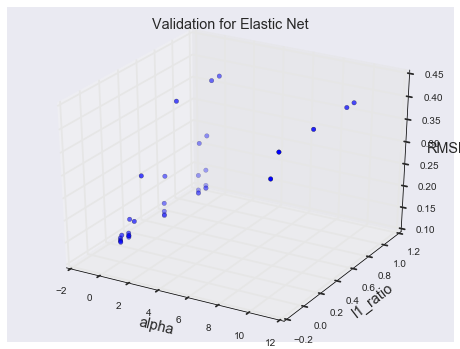

In [60]:
from mpl_toolkits.mplot3d import Axes3D

threedee = plt.figure().gca(projection='3d')

c1d = np.repeat(alpha, len(l1_ratio))
e1d = np.array(l1_ratio* len(alpha))
cv_enr1d = np.array(cv_enr).flatten()

threedee.scatter(c1d, e1d, cv_enr1d)
threedee.set_xlabel('alpha')
threedee.set_ylabel('l1_ratio')
threedee.set_zlabel('RMSE')
threedee.set_title('Validation for Elastic Net')

plt.show()

In [61]:
minindex = np.unravel_index(np.argmin(cv_enr), cv_enr.shape)
best_alpha_for_enr = alpha[minindex[0]]
best_ratio_for_enr = l1_ratio[minindex[1]]
best_alpha_for_enr, best_ratio_for_enr

(0.001, 0.5)

In [62]:
model_enr = ElasticNet(alpha = best_alpha_for_enr, l1_ratio = best_ratio_for_enr)
model_enr.fit(train_X, train_y)
rmse_enr_test = np.sqrt(mean_squared_error(test_y, model_enr.predict(test_X)))
rmse_enr_test

0.41138444482891401

In [67]:
df_all

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice
0,60,RL,-0.217879,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,-0.103331,-0.285935,-0.06315,-0.089592,0.090909,0.50,WD,Normal,208500,12.247699
1,20,RL,-0.072044,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,-0.103331,-0.285935,-0.06315,-0.089592,0.363636,0.25,WD,Normal,181500,12.109016
2,60,RL,0.137197,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,-0.103331,-0.285935,-0.06315,-0.089592,0.727273,0.50,WD,Normal,223500,12.317171
3,70,RL,-0.078385,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,-0.103331,-0.285935,-0.06315,-0.089592,0.090909,0.00,WD,Abnorml,140000,11.849405
4,60,RL,0.518903,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,-0.103331,-0.285935,-0.06315,-0.089592,1.000000,0.50,WD,Normal,250000,12.429220
5,50,RL,0.500515,IR1,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,12.603223,-0.285935,-0.06315,1.144312,0.818182,0.75,WD,Normal,143000,11.870607
6,20,RL,-0.010667,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,...,-0.103331,-0.285935,-0.06315,-0.089592,0.636364,0.25,WD,Normal,307000,12.634606
7,60,RL,0.027123,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,...,-0.103331,-0.285935,-0.06315,0.527360,0.909091,0.75,WD,Normal,200000,12.206078
8,50,RM,-0.513352,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,...,-0.103331,-0.285935,-0.06315,-0.089592,0.272727,0.50,WD,Abnorml,129900,11.774528
9,190,RL,-0.348496,Reg,Lvl,Corner,Gtl,BrkSide,Artery,Artery,...,-0.103331,-0.285935,-0.06315,-0.089592,0.000000,0.50,WD,Normal,118000,11.678448


In [78]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") #ignore some suppres warnings

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

#def dataread(dir):
#    train_X = pd.read_csv(dir + "train.csv")
#    train_y = pd.read_csv(dir + "train_label.csv")
#    test_X = pd.read_csv(dir + "test.csv")
#    test_y = pd.read_csv(dir + "test_label.csv")
#    return train_X, train_y, test_X, test_y

#train_X, train_y, test_X, test_y = dataread("./data/processed_csv/")
#alldata_X = pd.concat((train_X, test_X), ignore_index = True)
#test_y = test_y.round(0).astype(int)
#alldata_y = pd.concat((train_y, test_y), ignore_index = True)

dir = "./data/"
tpd_train = pd.read_csv(dir + "train.csv").loc[:,'MSSubClass': ]
tpd_test = pd.concat((pd.read_csv(dir + "test.csv").loc[:,'MSSubClass': ], pd.read_csv(dir + "sample_submission.csv")['SalePrice'].round(0).astype(int)), axis = 1, ignore_index = False)
tpd_all = pd.concat((tpd_train, tpd_test), ignore_index = True)


ttrain_X = tpd_train.loc[:,'MSSubClass': 'SaleCondition']
ttrain_y = tpd_train.loc[:,'SalePrice':'SalePrice']
ttest_X = tpd_test.loc[:,'MSSubClass': 'SaleCondition']
ttest_y = tpd_test.loc[:,'SalePrice':'SalePrice']
tpd_all_X = pd.concat((ttrain_X, ttest_X), ignore_index = True)
tpd_all_y = pd.concat((ttrain_y, ttest_y), ignore_index = True)

In [81]:
#log transform the target:
tpd_all_y["SalePrice"] = np.log1p(tpd_all_y["SalePrice"])

#log transform skewed numeric features:
numeric_feats = tpd_all_X.dtypes[tpd_all_X.dtypes != "object"].index

skewed_feats = tpd_all_X[numeric_feats].apply(lambda x: x.dropna().skew())#skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

tpd_all_X[skewed_feats] = np.log1p(tpd_all_X[skewed_feats])

In [83]:
tpd_all_X.drop('Alley', axis = 1, inplace = True)
tpd_all_X.drop('PoolQC', axis=1, inplace=True)
tpd_all_X.drop('Fence', axis=1, inplace=True)
tpd_all_X.drop('MiscFeature', axis=1, inplace=True)
tpd_all_X.drop('Street', axis=1, inplace = True) # only twelve is different
tpd_all_X.drop('Utilities', axis=1, inplace = True) # only one is different
tpd_all_X.drop('RoofMatl', axis=1, inplace = True)
tpd_all_X.drop('FireplaceQu', axis=1, inplace = True)
tpd_all_X.drop('LotFrontage', axis=1, inplace = True)

In [87]:
tpd_all_X = pd.get_dummies(tpd_all_X)
tpd_all_X = tpd_all_X.fillna(tpd_all_X.mean())
tpd_train_X = tpd_all_X[:ttrain_X.shape[0]]
tpd_train_y = tpd_all_y[:ttrain_X.shape[0]]
tpd_test_X = tpd_all_X[ttrain_X.shape[0]:]
tpd_test_y = tpd_all_y[ttrain_X.shape[0]:]

In [88]:
from sklearn.model_selection import cross_val_score
def trmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, tpd_train_X, tpd_train_y, scoring = "neg_mean_squared_error", cv = 10))
    return rmse

In [89]:
from sklearn.linear_model import ElasticNet
alpha = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10]
l1_ratio = [0.01, 0.1, 0.5, 0.9, 0.99]

cv_enr = np.empty([len(alpha), len(l1_ratio)])
for i in range(len(alpha)):
    for j in range(len(l1_ratio)):
        cv_enr[i][j] = trmse_cv(ElasticNet(alpha = alpha[i], l1_ratio = l1_ratio[j])).mean()

In [91]:
cv_enr

array([[ 0.13189826,  0.13122241,  0.1291324 ,  0.12772626,  0.12745838],
       [ 0.12847714,  0.12671865,  0.1229791 ,  0.12222905,  0.12217894],
       [ 0.12667448,  0.12440785,  0.12220181,  0.12253666,  0.12284772],
       [ 0.1241736 ,  0.12622335,  0.14120008,  0.14743482,  0.1484834 ],
       [ 0.13803051,  0.15751626,  0.19965607,  0.21568542,  0.21986961],
       [ 0.18438917,  0.23427214,  0.26362245,  0.26645264,  0.26730548],
       [ 0.25179372,  0.26765789,  0.30421936,  0.30618177,  0.30677718]])

In [92]:
minindex = np.unravel_index(np.argmin(cv_enr), cv_enr.shape)
best_alpha_for_enr = alpha[minindex[0]]
best_ratio_for_enr = l1_ratio[minindex[1]]
best_alpha_for_enr, best_ratio_for_enr

(0.0005, 0.99)

In [93]:
model_enr = ElasticNet(alpha = best_alpha_for_enr, l1_ratio = best_ratio_for_enr)
model_enr.fit(tpd_train_X, tpd_train_y)
rmse_enr_test = np.sqrt(mean_squared_error(tpd_test_y, model_enr.predict(tpd_test_X)))
rmse_enr_test

0.38253617264026923